# Acquire
## Zillow

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

from env import host, user, password, get_db_url

In [2]:
# zillow_query = """
# SELECT prop.*, pred.logerror, pred.transactiondate, ac.airconditioningdesc, ar.architecturalstyledesc, bu.buildingclassdesc, he.heatingorsystemdesc, la.propertylandusedesc, st.storydesc, co.typeconstructiondesc
# FROM properties_2017 AS prop
# JOIN (
# 	SELECT parcelid, MAX(logerror) as logerror, MAX(transactiondate) AS transactiondate
# 	FROM predictions_2017
# 	GROUP BY parcelid) AS pred ON prop.parcelid = pred.parcelid
# LEFT JOIN airconditioningtype AS ac USING(airconditioningtypeid)
# LEFT JOIN architecturalstyletype AS ar USING(architecturalstyletypeid)
# LEFT JOIN buildingclasstype AS bu USING(buildingclasstypeid)
# LEFT JOIN heatingorsystemtype AS he USING(heatingorsystemtypeid)
# LEFT JOIN propertylandusetype AS la USING(propertylandusetypeid)
# LEFT JOIN storytype AS st USING(storytypeid)
# LEFT JOIN typeconstructiontype as co USING(typeconstructiontypeid)
# WHERE prop.latitude IS NOT NULL
# AND prop.longitude IS NOT NULL;"""

In [3]:
# zillow_url = get_db_url("zillow")

In [4]:
# df = pd.read_sql(zillow_query, zillow_url)
# df

In [5]:
def get_zillow_data():
    # query
    zillow_query = """
    SELECT prop.*, pred.logerror, pred.transactiondate, ac.airconditioningdesc, ar.architecturalstyledesc, bu.buildingclassdesc, he.heatingorsystemdesc, la.propertylandusedesc, st.storydesc, co.typeconstructiondesc
    FROM properties_2017 AS prop
    JOIN (
        SELECT parcelid, MAX(logerror) as logerror, MAX(transactiondate) AS transactiondate
        FROM predictions_2017
        GROUP BY parcelid) AS pred ON prop.parcelid = pred.parcelid
    LEFT JOIN airconditioningtype AS ac USING(airconditioningtypeid)
    LEFT JOIN architecturalstyletype AS ar USING(architecturalstyletypeid)
    LEFT JOIN buildingclasstype AS bu USING(buildingclasstypeid)
    LEFT JOIN heatingorsystemtype AS he USING(heatingorsystemtypeid)
    LEFT JOIN propertylandusetype AS la USING(propertylandusetypeid)
    LEFT JOIN storytype AS st USING(storytypeid)
    LEFT JOIN typeconstructiontype as co USING(typeconstructiontypeid)
    WHERE prop.latitude IS NOT NULL
    AND prop.longitude IS NOT NULL;"""
    
    # get url
    zillow_url = get_db_url("zillow")
    
    df = pd.read_sql(zillow_query, zillow_url)
    
    return df

In [6]:
df = get_zillow_data()

In [7]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,None,NaN,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,None,NaN,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
2,1340933,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,None,NaN,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
3,1878109,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,None,NaN,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,Single Family Residential,None,None
4,2190858,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,None,NaN,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,Single Family Residential,None,None


In [8]:
df.isnull().sum().sort_values(ascending=False)

buildingclassdesc       77366
buildingclasstypeid     77366
finishedsquarefeet13    77340
basementsqft            77331
storydesc               77331
                        ...  
assessmentyear              0
logerror                    0
transactiondate             0
propertylandusedesc         0
id                          0
Length: 68, dtype: int64

In [9]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738100e+04,7.738100e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,76772.000000,614.0,6023.000000,77185.000000,73749.000000,41.000000,3009.000000,6023.000000,386.000000,77381.000000,8276.000000,76772.000000,25474.000000,25474.000000,1538.0,49440.000000,7.738100e+04,7.738100e+04,6.914200e+04,16137.0,867.000000,464.0,1074.0,15042.0,77381.000000,7.738100e+04,75910.000000,77381.000000,30890.000000,77331.000000,77381.000000,50.0,10096.000000,222.000000,50563.000000,2388.000000,70.000000,77118.000000,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000
mean,1.495139e+06,1.300715e+07,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,2.316867,66.0,1366.512535,1785.219939,1760.522543,1389.853659,2357.791625,1381.771542,2082.500000,6048.819232,1.191155,2.250482,1.815459,350.111957,1.0,3.920510,3.400837e+07,-1.182036e+08,2.996928e+04,1.0,517.916955,1.0,1.0,1.0,261.826340,6.049129e+07,33671.242708,2534.158333,187734.864066,96587.086822,1.476952,7.0,1.009608,6.040541,1.110021,305.411223,216.385714,1968.635831,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,0.017048
std,8.609071e+05,3.481346e+06,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,0.979755,0.0,671.308125,954.049286,934.024340,123.531688,1188.775210,726.468878,1240.382784,20.748199,0.491080,0.966552,0.588345,261.681641,0.0,3.592779,2.653888e+05,3.594826e+05,1.233711e+05,0.0,156.716017,0.0,0.0,0.0,5.141199,2.059052e+05,47169.815982,801.593352,165118.791740,3798.347098,2.824386,0.0,0.118630,0.557285,1.171154,238.392793,190.177514,23.786032,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,0.169728
min,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,7.520700e+05,1.153830e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1625.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,1.0,2.000000,3.381457e+07,-1.184153e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,261.000000,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,-0.024121
50%,1.497932e+06,1.253157e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,66.0,1257.000000,1543.000000,1523.000000,1440.000000,2094.000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 68 columns):
id                              77381 non-null int64
parcelid                        77381 non-null int64
airconditioningtypeid           24953 non-null float64
architecturalstyletypeid        206 non-null float64
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
buildingclasstypeid             15 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
finishedsquarefeet12            73749 non-null float64
finishedsquarefeet13            41 non-null float64
finishedsquarefeet15            3009 non-null float64
finishedsquarefeet50          

In [11]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
buildingclassdesc            object
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 68, dtype: object

In [12]:
df.shape

(77381, 68)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/anaconda3/lib/python3.7/site-package

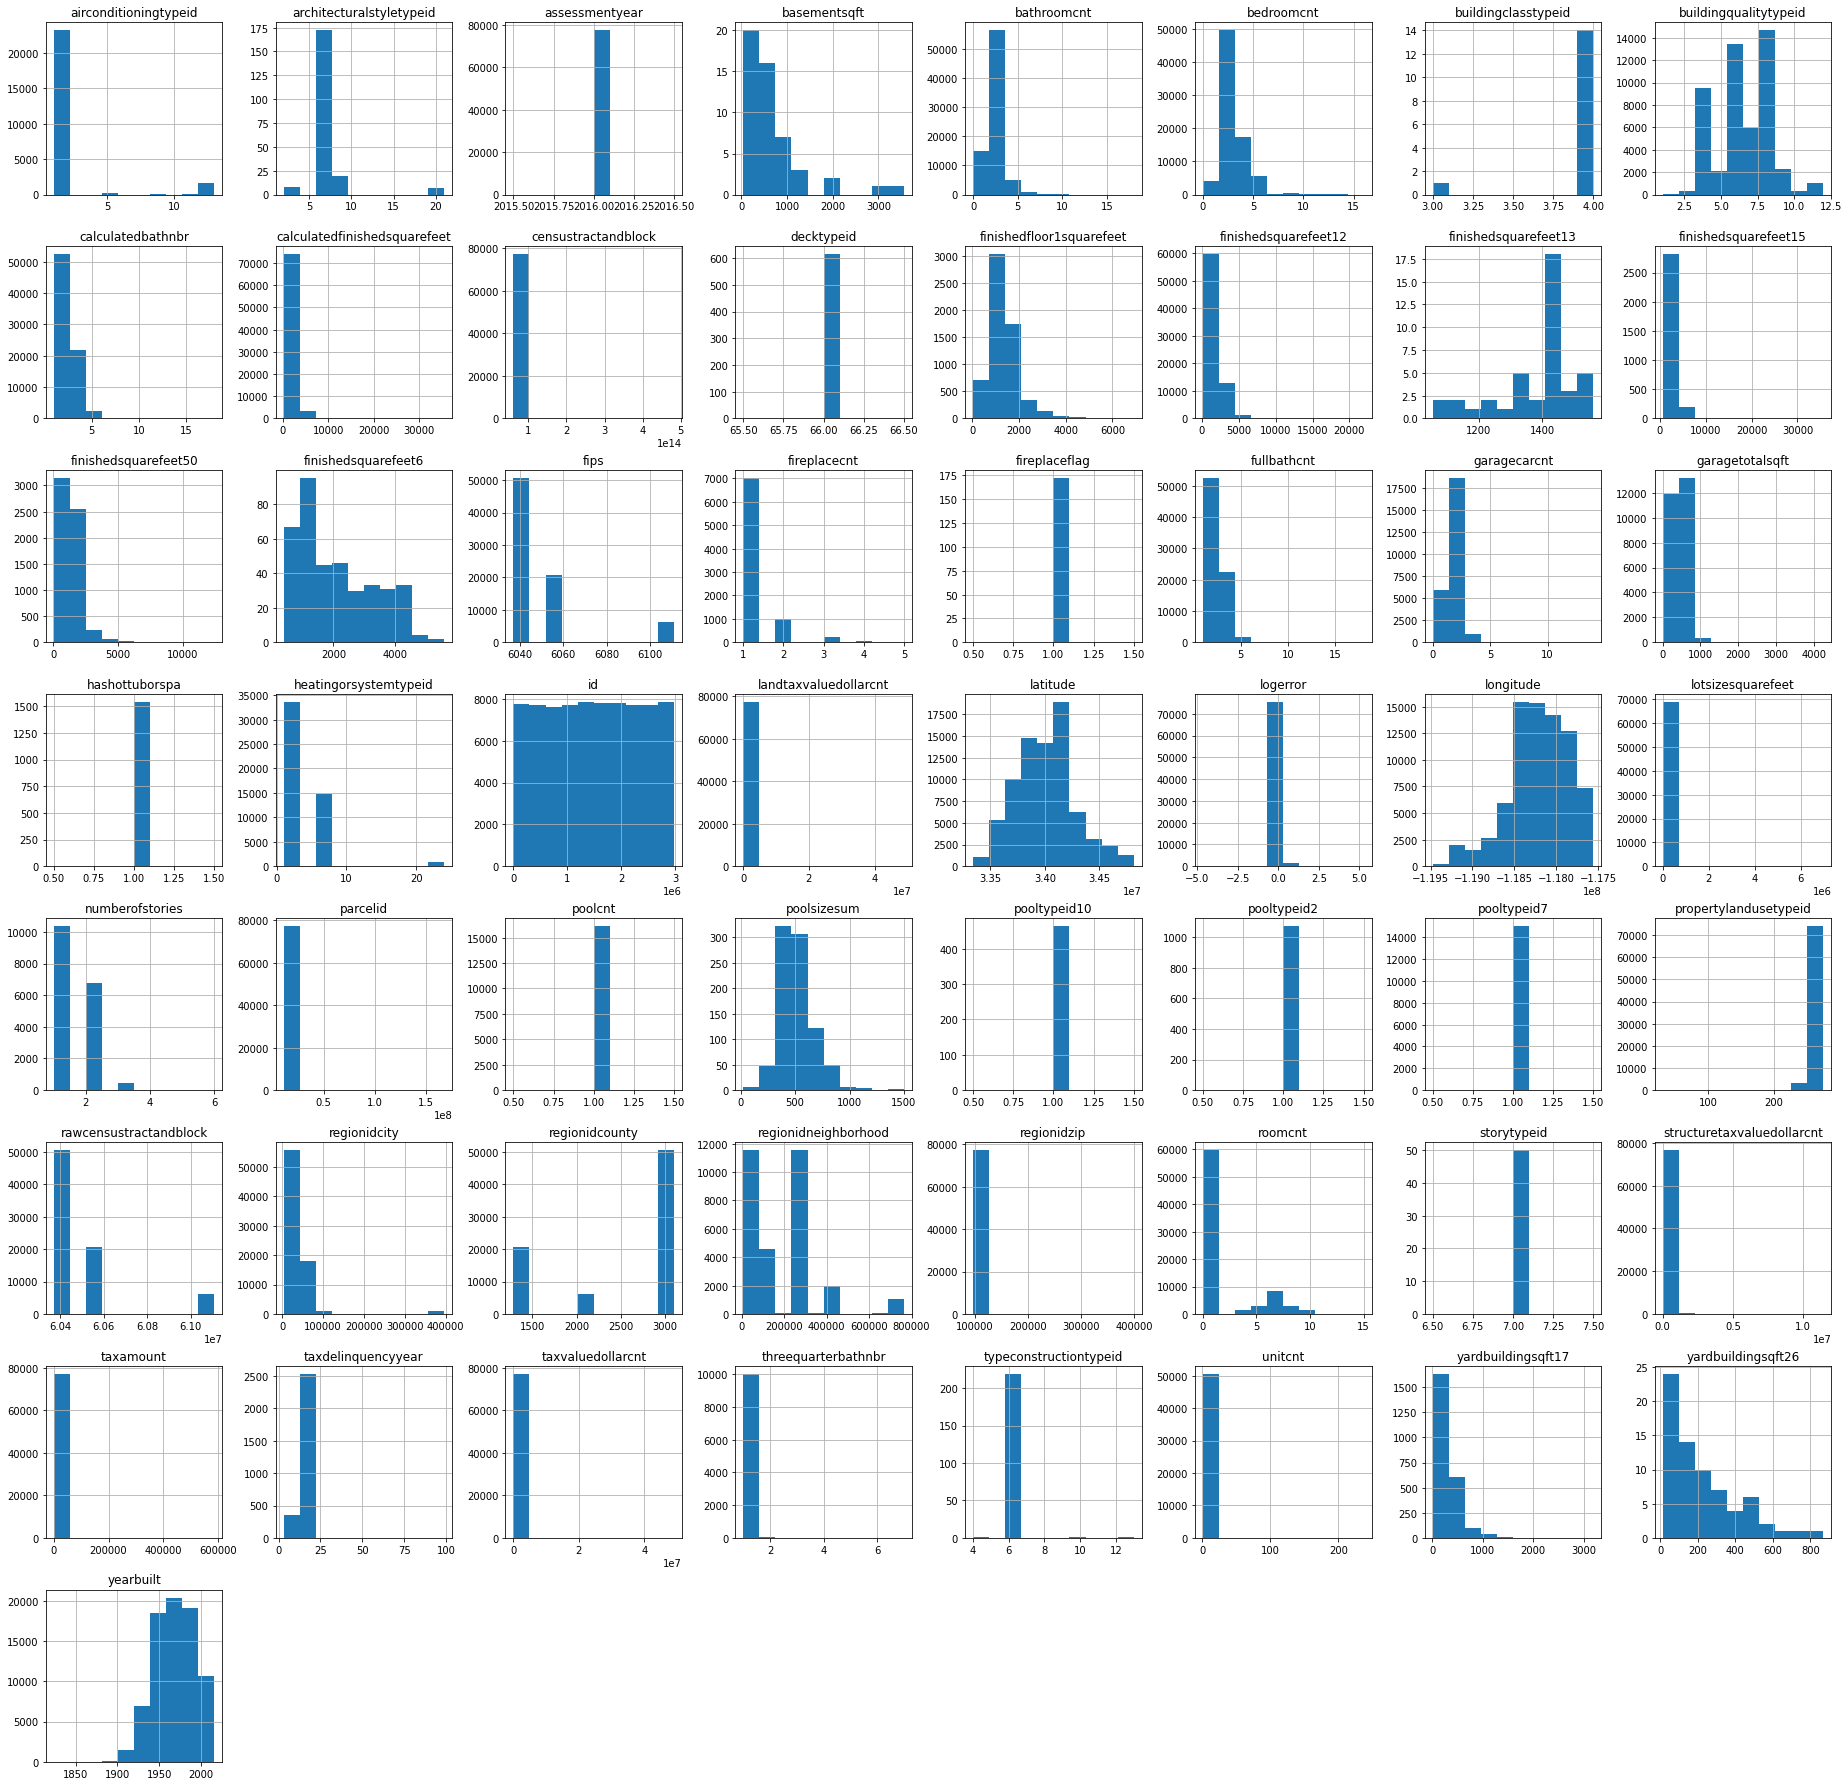

In [13]:
df.hist(figsize=(32, 32))
plt.show()

In [14]:
for c in df.columns:
    print(df[c].value_counts())
    print()

657407     1
2800516    1
420568     1
1861740    1
1211098    1
          ..
1570068    1
1965333    1
648470     1
1699095    1
2232322    1
Name: id, Length: 77381, dtype: int64

14753348    1
12227079    1
13040138    1
12251659    1
12896780    1
           ..
12874898    1
13075610    1
12827805    1
12428446    1
14298875    1
Name: parcelid, Length: 77381, dtype: int64

1.0     23133
13.0     1574
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64

7.0     172
8.0      19
21.0      7
2.0       5
3.0       3
Name: architecturalstyletypeid, dtype: int64

700.0     2
515.0     2
900.0     2
912.0     2
640.0     2
273.0     2
100.0     2
3560.0    1
396.0     1
204.0     1
405.0     1
674.0     1
669.0     1
394.0     1
380.0     1
819.0     1
786.0     1
3112.0    1
1809.0    1
645.0     1
512.0     1
224.0     1
168.0     1
254.0     1
352.0     1
280.0     1
314.0     1
1252.0    1
112.0     1
252.0     1
126.0     1
200.0     1
300.0     1
1218

Name: airconditioningdesc, dtype: int64

Contemporary     172
Conventional      19
Ranch/Rambler      7
Bungalow           5
Cape Cod           3
Name: architecturalstyledesc, dtype: int64

Buildings having wood or wood and steel frames                                                                                                                                                                                             14
Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.     1
Name: buildingclassdesc, dtype: int64

Central       33550
Floor/Wall    14065
Yes             846
Forced air      776
Solar           104
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

Single Family Residential                     52320
Co

In [15]:
missing = pd.DataFrame({
    "num_rows_missing": df.isnull().sum(axis=0),
    "pct_rows_missing": df.isnull().sum(axis=0) / df.shape[0]
})

missing

,num_rows_missing,pct_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
...,...,...
buildingclassdesc,77366,0.999806
heatingorsystemdesc,27941,0.361083
propertylandusedesc,0,0.000000
storydesc,77331,0.999354


In [16]:
def nulls_by_column(df):
    missing_rows = pd.DataFrame({
        "num_rows_missing": df.isnull().sum(axis=0),
        "pct_rows_missing": df.isnull().sum(axis=0) / df.shape[0]
    })
    return missing_rows

In [17]:
nulls_by_column = nulls_by_column(df)
nulls_by_column

,num_rows_missing,pct_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
...,...,...
buildingclassdesc,77366,0.999806
heatingorsystemdesc,27941,0.361083
propertylandusedesc,0,0.000000
storydesc,77331,0.999354


In [18]:
def nulls_by_row(df):
    missing_columns = pd.DataFrame({
        "num_cols_missing": df.isnull().sum(axis=1),
        "pct_cols_missing": df.isnull().sum(axis=1) / df.shape[1]*100,
    })
    return missing_columns

In [19]:
nulls_by_row = nulls_by_row(df)
nulls_by_row

,num_cols_missing,pct_cols_missing
0,31,45.588235
1,29,42.647059
2,31,45.588235
3,31,45.588235
4,31,45.588235
...,...,...
77376,48,70.588235
77377,47,69.117647
77378,48,70.588235
77379,37,54.411765


In [20]:
# missing_columns = pd.DataFrame({
#     "num_cols_missing": df.isnull().sum(axis=1),
#     "pct_cols_missing": df.isnull().sum(axis=0) / df.shape[0],
#     "num_rows": 
# })

# missing_columns

In [21]:
# df.isnull().sum()

In [22]:
df = df[df.propertylandusetypeid.isin([260, 261, 262, 279])]
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,None,NaN,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,None,NaN,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
2,1340933,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,None,NaN,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
3,1878109,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,None,NaN,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,Single Family Residential,None,None
4,2190858,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,None,NaN,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77370,358149,167637371,1.0,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,NaN,4000.0,4000.0,NaN,NaN,NaN,NaN,6037.0,NaN,5.0,NaN,NaN,NaN,2.0,34089958.0,-118451987.0,NaN,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE20,6.037262e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2013.0,NaN,NaN,1664376.0,2597367.0,2016.0,932991.0,54391.29,None,NaN,NaN,2.069414,2017-07-31,Central,None,None,Central,Single Family Residential,None,None
77371,835451,167638003,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,2108.0,2108.0,NaN,NaN,NaN,NaN

In [23]:
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0)]
df.shape

(52179, 68)

In [24]:
df.unitcnt.value_counts()

1.0    33699
2.0       26
4.0        2
3.0        1
Name: unitcnt, dtype: int64

In [25]:
df.unitcnt.isnull().sum()

18451

In [26]:
df.unitcnt = df.unitcnt.fillna(1.0)
df.shape

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(52179, 68)

In [27]:
# filter out units with more than one unit
df = df[df.unitcnt == 1.0]
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,2107.0,2107.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222559.0,-118617387.0,9158.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,None,NaN,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220261.0,-118616409.0,9035.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,None,NaN,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
2,1340933,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1882.0,1882.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34222491.0,-118616854.0,9800.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1972.0,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,None,NaN,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
3,1878109,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34221864.0,-118615739.0,11285.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,None,NaN,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,Single Family Residential,None,None
4,2190858,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34220619.0,-118615253.0,11239.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1960.0,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,None,NaN,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77363,2684284,167636727,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,NaN,2670.0,2670.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34681736.0,-118096714.0,NaN,NaN,NaN,NaN,NaN,NaN,0100,261.0,LRR7000,6.037901e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2006.0,NaN,NaN,182200.0,242900.0,2016.0,60700.0,3865.75,None,NaN,NaN,0.016445,2017-07-07,Central,None,None,Central,Single Family Residential,None,None
77366,1596111,167637054,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,NaN,NaN,756.0,756.0,NaN,NaN,NaN,NaN,60

In [28]:
df.unitcnt.value_counts()

1.0    52150
Name: unitcnt, dtype: int64

In [33]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [35]:
def handle_missing_values(df, prop_required_column = .60, prop_required_row = .60):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [37]:
df = handle_missing_values(df)
df.shape

(52150, 34)

In [40]:
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18537
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
heatingorsystemtypeid           18334
latitude                            0
longitude                           0
lotsizesquarefeet                 350
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              18476
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         69
taxvaluedollarcnt                   1
assessmentye

In [39]:
df.heatingorsystemdesc.isnull().sum()

18334

In [43]:
df.heatingorsystemdesc.value_counts(dropna=False)

Central       20676
NaN           18334
Floor/Wall    12506
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [44]:
df.heatingorsystemdesc = df.heatingorsystemdesc.fillna("None")

In [45]:
df.isna().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18537
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
heatingorsystemtypeid           18334
latitude                            0
longitude                           0
lotsizesquarefeet                 350
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              18476
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         69
taxvaluedollarcnt                   1
assessmentye

In [47]:
df.propertyzoningdesc.value_counts()

LAR1          6469
LARS          1380
LBR1N         1109
SCUR2          712
LARE11         610
              ... 
CLRS1000*        1
INM1L*           1
PDC1DP*          1
WAR120000*       1
LCR112           1
Name: propertyzoningdesc, Length: 1280, dtype: int64

In [49]:
df = df.drop(columns="propertyzoningdesc")
df.shape

(52150, 33)

In [50]:
df.isna().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18537
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
heatingorsystemtypeid           18334
latitude                            0
longitude                           0
lotsizesquarefeet                 350
propertycountylandusecode           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         69
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue

In [52]:
# Overall assessment of condition of the building from best (lowest) to worst (highest)
df.buildingqualitytypeid.value_counts(dropna=False)

NaN     18537
6.0     10251
8.0      8221
4.0      8125
7.0      3419
5.0      1496
9.0      1120
11.0      515
10.0      228
3.0       147
12.0       80
1.0         8
2.0         3
Name: buildingqualitytypeid, dtype: int64

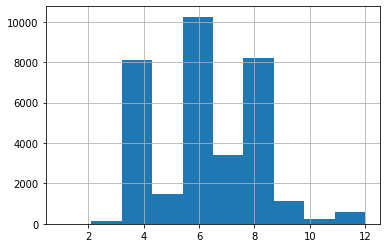

In [59]:
df.buildingqualitytypeid.hist(bins=10)

In [60]:
df.buildingqualitytypeid.mean()

6.266236277630679

In [61]:
df.buildingqualitytypeid.median()

6.0

In [62]:
df.buildingqualitytypeid.mode()

0    6.0
dtype: float64

In [63]:
df.buildingqualitytypeid = df.buildingqualitytypeid.fillna(df.buildingqualitytypeid.median())
df

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1087254,10711855,2.0,3.0,8.0,2.0,2107.0,2107.0,6037.0,2.0,2.0,34222559.0,-118617387.0,9158.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,249655.0,624139.0,2016.0,374484.0,7659.36,6.037113e+13,-0.007357,2017-07-07,Central,Single Family Residential
1,1072280,10711877,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,2.0,2.0,34220261.0,-118616409.0,9035.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,253000.0,660000.0,2016.0,407000.0,8123.91,6.037113e+13,0.021066,2017-08-29,Central,Single Family Residential
2,1340933,10711888,2.0,4.0,8.0,2.0,1882.0,1882.0,6037.0,2.0,2.0,34222491.0,-118616854.0,9800.0,0100,261.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1972.0,257591.0,542923.0,2016.0,285332.0,6673.24,6.037113e+13,0.077174,2017-04-04,Central,Single Family Residential
3,1878109,10711910,2.0,3.0,8.0,2.0,1477.0,1477.0,6037.0,2.0,2.0,34221864.0,-118615739.0,11285.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1960.0,57968.0,78031.0,2016.0,20063.0,1116.46,6.037113e+13,-0.041238,2017-03-17,Central,Single Family Residential
4,2190858,10711923,2.0,4.0,8.0,2.0,1918.0,1918.0,6037.0,2.0,2.0,34220619.0,-118615253.0,11239.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0,0.0,1.0,1960.0,167869.0,415459.0,2016.0,247590.0,5239.85,6.037113e+13,-0.009496,2017-03-24,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77363,2684284,167636727,3.0,4.0,4.0,3.0,2670.0,2670.0,6037.0,3.0,2.0,34681736.0,-118096714.0,NaN,0100,261.0,6.037901e+07,NaN,3101.0,NaN,0.0,1.0,2006.0,182200.0,242900.0,2016.0,60700.0,3865.75,NaN,0.016445,2017-07-07,Central,Single Family Residential
77366,1596111,167637054,1.0,2.0,7.0,1.0,756.0,756.0,6037.0,1.0,7.0,33863071.0,-118379246.0,NaN,0100,261.0,6.037621e+07,NaN,3101.0,NaN,0.0,1.0,1953.0,20083.0,84683.0,2016.0,64600.0,1631.15,NaN,-0.217256,2017-01-19,Floor/Wall,Single Family Residential
77370,358149,167637371,5.0,4.0,6.0,5.0,4000.0,4000.0,6037.0,5.0,2.0,34089958.0,-118451987.0,NaN,0101,261.0,6.037262e+07,NaN,3101.0,NaN,0.0,1.0,2013.0,1664376.0,2597367.0,2016.0,932991.0,54391.29,NaN,2.069414,2017-07-31,Central,Single Family Residential
77371,835451,167638003,3.0,3.0,4.0,3.0,2108.0,2108.0,6037.0,3.0,2.0,34126076.0,-118226237.0,NaN,0100,261.0,6.037186e+07,NaN,3101.0,NaN,0.0,1.0,2014.0,303559.0,709659.0,2016.0,406100.0,8621.13,NaN,-0.158701,2017-06-14,Central,Single Family Residential


In [65]:
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
fullbathcnt                        16
heatingorsystemtypeid           18334
latitude                            0
longitude                           0
lotsizesquarefeet                 350
propertycountylandusecode           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                             0
yearbuilt                          40
structuretaxvaluedollarcnt         69
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue